In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('weight_price_data.csv')

In [6]:
df

,Weight,Price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


In [7]:
df.head()

,Weight,Price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50


In [8]:
df.tail()

,Weight,Price
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


In [9]:
df.describe()

,Weight,Price
count,7.000000,7.000000
mean,4.571429,47.142857
std,1.718249,14.679107
min,2.000000,20.000000
25%,3.500000,42.500000
50%,5.000000,50.000000
75%,5.500000,57.500000
max,7.000000,60.000000


In [10]:
df.isnull().sum()

Weight    0
Price     0
dtype: int64

In [11]:
mean_x = np.mean(df['Weight'])
mean_y = np.mean(df['Price'])

In [12]:
mean_x

4.571428571428571

In [13]:
mean_y

47.142857142857146

In [14]:
dev_x = df['Weight']-mean_x
dev_y = df['Price'] - mean_y

In [15]:
x = df['Weight']
y = df['Price']

In [16]:
m = np.sum(dev_x* dev_y)/ np.sum(dev_x**2)

In [18]:
m

2.620967741935484

In [19]:
c = mean_y - (m*mean_x)

In [20]:
c

35.16129032258065

In [27]:
price_predict = m*6.5+c #y = mx +c

In [31]:
price_predict

52.197580645161295

Linear Model

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
reg = LinearRegression()

In [34]:
reg.fit(df[['Weight']],df[['Price']])

LinearRegression()

In [35]:
reg.predict([[6.5]])

C:\Users\Shakhawat\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[52.19758065]])

In [36]:
reg.coef_

array([[2.62096774]])

In [37]:
reg.intercept_

array([35.16129032])

In [38]:
df2 = df.copy()

In [39]:
df2

,Weight,Price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


In [40]:
df2['price_predict'] = reg.predict(df2[['Weight']])

In [41]:
df2

,Weight,Price,price_predict
0,2,35,40.403226
1,4,60,45.645161
2,5,20,48.266129
3,3,50,43.024194
4,6,50,50.887097
5,5,55,48.266129
6,7,60,53.508065


In [42]:
df2['res'] = df2['Price']-df2['price_predict']

In [43]:
df2['res']

0    -5.403226
1    14.354839
2   -28.266129
3     6.975806
4    -0.887097
5     6.733871
6     6.491935
Name: res, dtype: float64

In [44]:
df2

,Weight,Price,price_predict,res
0,2,35,40.403226,-5.403226
1,4,60,45.645161,14.354839
2,5,20,48.266129,-28.266129
3,3,50,43.024194,6.975806
4,6,50,50.887097,-0.887097
5,5,55,48.266129,6.733871
6,7,60,53.508065,6.491935


In [45]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Vegetables Price')

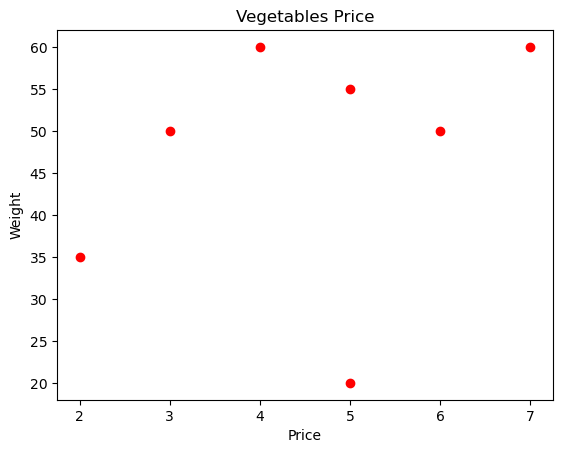

In [53]:
plt.scatter(df2[['Weight']],df2[['Price']],color='red',marker='o')
plt.xlabel('Price')
plt.ylabel('Weight')
plt.title('Vegetables Price')

In [54]:
reg.score(df2[['Weight']],df2[['Price']])

0.09412315095348434

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [56]:
mse = mean_squared_error(df2[["price_predict"]],df2[["Price"]])
mse

167.30990783410135

In [58]:
mae = mean_absolute_error(df2[["price_predict"]],df2[["Price"]])
mae

9.87327188940092